## HDP&LDA
In LDA, the number of manually selected topics is used as a parameter for the model. In HDP, however, the number of themes is generated by the Dirichlet process, but we can still adjust some hidden parameters to change the model.


LDA models documents as dirichlet mixtures of a fixed number of topics- chosen as a parameter of the model by the user- which are in turn dirichlet mixtures of words. This generates a flat, soft probabilistic clustering of terms into topics and documents into topics.

HDP models topics as mixtures of words, much like LDA, but rather than documents being mixtures of a fixed number of topics, the number of topics is generated by a dirichlet process, resulting in the number of topics being a random variable as well.

## Similarities and differences between LDA and HDP
HDP can be seen as an extension of LDA. In LDA, the user has to specify the number of topics as a parameter of the model. In HDP, on the other hand, one treats the number of topics as a random variable and determines the number of topics by means of a Dirichlet process. Thus, HDP can learn the maximum number of topics from a document with an unknown number of topics. 

In the LDA model, the output combines the documents into a pre-determined number of combinations. Eventually words or terms are clustered into topics.In HDP, the topics are modelled as a mixture of words, but the output is a combination of a fixed number of topics. This part is also the part that differs from LDA.In general, HDP is suitable for documents where the number of topics cannot be estimated under a priori conditions.

As in simpler finite mixture models, it is natural to try to extend LDA and related models by using DPs to capture uncertainty regarding the number of mixture components. This is somewhat more difficult than in the case of a simple mixture model, however, because in the LDA model the documents have document-specific mixing proportions. We thus require multiple DPs, one for each document. This then poses the problem of sharing mixture components across multiple DPs, precisely the problem that the hierarchical DP is designed to solve.（Hierarchical Dirichlet Processes, 2012） The hierarchical DP extension of LDA thus takes the following form. Given an underlying measure H on multinomial probability vectors, we select a random measure, Go, which provides a countably infinite collection of multinomial probability vectors; these can be viewed as the set of all topics that can be used in a given corpus. 

## Advantages of the model in different situations 

The main advantage of HDP over LDA is that the number of subjects can be set without the need for a predetermined parameter. In HDP, it is used as a non-parametric topic model, but the model is more complex to solve. In this assessment, however, both types of methods take a long time to build and train the model.
Therefore,we think that the thematic model could be improved in a number of ways, for example: 

1. Serial operations are mostly used in the building of the model, which makes the operations a lot slower. Therefore, I think a theme model with parallel computing would have no small advantage. 

2. In the few types of theme models that I have come across, most of them are unsupervised learning, but the datasets mostly come with annotations. Therefore, a supervised topic model might be better for clustering


In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [12]:
#import data

file = 'Data\PreProcessedData.csv'
data = read_csv(file)
data.head()

,IMDbRating,Title,Year,Plot,Action,Adult,Adventure,Animation,Biography,Comedy,...,Zac Efron,Zach Braff,Zach Galifianakis,Zachary Quinto,Zazie Beetz,Zoe Kazan,Zoe Saldana,Zoey Deutch,Zooey Deschanel,Zoë Kravitz
0,7.1,Aberdeen,2000,"Kaisa is a Scot, a successful London lawyer, w...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,The Asylum,2000,"Plagued by endless visions and nightmares, Jen...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.6,The Beach,2000,Garland's novel centers on a young nicotine-ad...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.6,Beautiful Joe,2000,"In the Bronx, Joe (Sir Billy Connolly), an Iri...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.7,Billy Elliot,2000,"County Durham, during the endless, violent 198...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#data pre-processing
import re
import string

#punctuation
for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    for i in string.punctuation:
        temp = temp.replace(i, '')
    data.loc[row.Index,'Plot'] = temp

In [14]:
#stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.update({"one","two"})

for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    word_tokens = word_tokenize(temp, language='english',preserve_line=False)
    filtered_sentence = []
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    e = ' '.join([str(item).lower() for item in filtered_sentence])
    data.loc[row.Index,'Plot'] = e
    


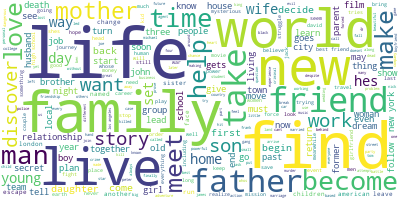

In [15]:
from wordcloud import WordCloud
long_string = ','.join(list(data['Plot'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [16]:
#LDA
from pprint import pprint
import gensim
import gensim.corpora as corpora

data_words = []
for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    word_tokens = word_tokenize(temp, language='english',preserve_line=False)
    data_words.append(word_tokens)


id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)


In [7]:
pprint(lda_model.print_topics(num_topics=20, num_words=10))

[(0,
  '0.008*"show" + 0.006*"however" + 0.006*"becoming" + 0.005*"jerry" + '
  '0.005*"perform" + 0.005*"host" + 0.005*"he" + 0.005*"talk" + 0.004*"wants" '
  '+ 0.004*"friend"'),
 (1,
  '0.005*"the" + 0.004*"he" + 0.003*"love" + 0.003*"life" + 0.003*"world" + '
  '0.003*"finds" + 0.003*"when" + 0.003*"but" + 0.003*"new" + 0.003*"young"'),
 (2,
  '0.006*"the" + 0.004*"young" + 0.003*"when" + 0.003*"family" + 0.003*"life" '
  '+ 0.003*"new" + 0.003*"salo" + 0.003*"wife" + 0.003*"in" + 0.003*"get"'),
 (3,
  '0.007*"life" + 0.006*"a" + 0.005*"the" + 0.005*"new" + 0.004*"together" + '
  '0.003*"friends" + 0.003*"family" + 0.003*"man" + 0.003*"school" + '
  '0.003*"in"'),
 (4,
  '0.005*"new" + 0.005*"the" + 0.004*"in" + 0.003*"when" + 0.003*"find" + '
  '0.003*"years" + 0.003*"young" + 0.003*"life" + 0.003*"old" + 0.002*"time"'),
 (5,
  '0.005*"life" + 0.005*"lives" + 0.005*"the" + 0.004*"real" + 0.004*"three" + '
  '0.004*"better" + 0.004*"ever" + 0.004*"salo" + 0.004*"but" + 0.004*"begin

In [8]:
#HDP model
from gensim.models import HdpModel

hdp = HdpModel(corpus, id2word)
topic_info = hdp.print_topics(num_topics=20, num_words=10)

In [9]:
pprint(hdp.print_topics(num_topics=20, num_words=10))

[(0,
  '0.006*the + 0.005*life + 0.005*new + 0.003*when + 0.003*a + 0.003*in + '
  '0.003*family + 0.003*find + 0.003*but + 0.003*young'),
 (1,
  '0.015*show + 0.011*however + 0.010*host + 0.010*talk + 0.010*jerry + '
  '0.010*perform + 0.006*he + 0.006*must + 0.006*wants + 0.006*friend'),
 (2,
  '0.005*the + 0.004*life + 0.003*a + 0.003*world + 0.003*find + 0.003*new + '
  '0.003*when + 0.003*he + 0.003*young + 0.002*in'),
 (3,
  '0.004*the + 0.003*life + 0.003*family + 0.003*a + 0.002*find + 0.002*world '
  '+ 0.002*but + 0.002*when + 0.002*time + 0.002*love'),
 (4,
  '0.020*salo + 0.010*wife + 0.010*drug + 0.010*reverend + 0.010*becomes + '
  '0.010*luck + 0.010*jr + 0.010*graces + 0.010*salvation + 0.005*the'),
 (5,
  '0.015*better + 0.015*real + 0.015*lives + 0.015*becoming + 0.015*could + '
  '0.015*three + 0.015*students + 0.015*obsession + 0.015*begin + 0.015*ever'),
 (6,
  '0.004*the + 0.002*new + 0.002*young + 0.002*a + 0.002*man + 0.002*father + '
  '0.002*life + 0.002*he + 

In [10]:
vector = []
for i in range(len(data_words)):
    top_topics = (
        hdp.get_topics()
    )
    topic_vec = [top_topics[i][1] for i in range(150)]
    vector.append(topic_vec)

